In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
%matplotlib inline

In [68]:
ufc_df = pd.read_csv('ufc_data.csv')
# Change columns name
ufc_df.rename(columns={
    "Fight Type": "fight_type",
    "Time:": "time",
    "Round:":"round",
    "Method:": "method",
    "Time format:": "time_format",
    "Referee:": "referee",
    "Details": "details",
    "Winner": "winner",
    "r_figher": "r_fighter",
    "b_figher": "b_fighter",
    "r_figher_sig_str": "r_fighter_ss",
    "b_figher_sig_str": "b_fighter_ss",
    "r_figher_sig_str %":"r_fighter_ss_pct",
    "b_figher_sig_str %": "b_fighter_ss_pct",
    "r_figher_total_str": "r_fighter_total_str",
    "b_figher_total_str": "b_fighter_total_str"
}, inplace=True)
ufc_df.head()

,fight_type,method,round,time,time_format,referee,details,winner,r_fighter,b_fighter,r_fighter_ss,b_fighter_ss,r_fighter_ss_pct,b_fighter_ss_pct,r_fighter_total_str,b_fighter_total_str
0,Light Heavyweight Bout,KO/TKO,2,4:29,5 Rnd (5-5-5-5-5),Herb Dean,Elbow to Head At Distance\n Spinning Back...,Jiri Prochazka,Dominick Reyes,Jiri Prochazka,63 of 108,77 of 136,58%,56%,68 of 114,78 of 137
1,Featherweight Bout,KO/TKO,1,1:03,3 Rnd (5-5-5),Jason Herzog,Kick to Body At Distance,Giga Chikadze,Giga Chikadze,Cub Swanson,12 of 18,4 of 6,66%,66%,12 of 18,4 of 6
2,Light Heavyweight Bout,Decision - Split,3,5:00,3 Rnd (5-5-5),Mark Smith,Dave Hagen28 - 29.Rick Winter29 - 28.Tony Week...,draw,Ion Cutelaba,Dustin Jacoby,71 of 152,84 of 148,46%,56%,111 of 201,100 of 164
3,Middleweight Bout,Decision - Unanimous,3,5:00,3 Rnd (5-5-5),Herb Dean,Sal D'amato27 - 30.Junichiro Kamijo27 - 30.Ada...,Sean Strickland,Sean Strickland,Krzysztof Jotko,84 of 182,37 of 196,46%,18%,84 of 182,37 of 196
4,Bantamweight Bout,Decision - Unanimous,3,5:00,3 Rnd (5-5-5),Chris Tognoni,Mike Bell27 - 30.Sal D'amato28 - 29.Rick Winte...,Merab Dvalishvili,Merab Dvalishvili,Cody Stamann,71 of 192,48 of 134,36%,35%,178 of 306,73 of 163


In [69]:
# Work on copied data
df = ufc_df.copy()

## Data cleaning and preprocessing
- convert b_fighter_sig_str % and b_fighter_sig_str % columns to int
- convert r_fighter_ss', 'b_fighter_ss', 'r_fighter_total_str', 'b_fighter_total_str to int (keep the first number)

In [70]:
# convert object to number
def to_int(number):
    if number == "---":
        return pd.to_numeric(0)
    else:
        return pd.to_numeric(number.replace("%", ""))

# convert first number of siginificant strike and total fight
def get_first_number(number):
    first_num = number.split('of')[0]
    return to_int(first_num)

In [71]:
# convert to int and datetime
df['b_fighter_ss_pct'] = df['b_fighter_ss_pct'].apply(lambda x: to_int(x))
df['r_fighter_ss_pct'] = df['r_fighter_ss_pct'].apply(lambda x: to_int(x))
df['time'] = pd.to_datetime(df['time']).dt.time

# keep only the first number of these columns and convert them to int
columns = ['r_fighter_ss', 'b_fighter_ss', 'r_fighter_total_str', 'b_fighter_total_str']
for column in columns:
    df[column] = df[column].apply(lambda x: get_first_number(x))
df.head()

,fight_type,method,round,time,time_format,referee,details,winner,r_fighter,b_fighter,r_fighter_ss,b_fighter_ss,r_fighter_ss_pct,b_fighter_ss_pct,r_fighter_total_str,b_fighter_total_str
0,Light Heavyweight Bout,KO/TKO,2,04:29:00,5 Rnd (5-5-5-5-5),Herb Dean,Elbow to Head At Distance\n Spinning Back...,Jiri Prochazka,Dominick Reyes,Jiri Prochazka,63,77,58,56,68,78
1,Featherweight Bout,KO/TKO,1,01:03:00,3 Rnd (5-5-5),Jason Herzog,Kick to Body At Distance,Giga Chikadze,Giga Chikadze,Cub Swanson,12,4,66,66,12,4
2,Light Heavyweight Bout,Decision - Split,3,05:00:00,3 Rnd (5-5-5),Mark Smith,Dave Hagen28 - 29.Rick Winter29 - 28.Tony Week...,draw,Ion Cutelaba,Dustin Jacoby,71,84,46,56,111,100
3,Middleweight Bout,Decision - Unanimous,3,05:00:00,3 Rnd (5-5-5),Herb Dean,Sal D'amato27 - 30.Junichiro Kamijo27 - 30.Ada...,Sean Strickland,Sean Strickland,Krzysztof Jotko,84,37,46,18,84,37
4,Bantamweight Bout,Decision - Unanimous,3,05:00:00,3 Rnd (5-5-5),Chris Tognoni,Mike Bell27 - 30.Sal D'amato28 - 29.Rick Winte...,Merab Dvalishvili,Merab Dvalishvili,Cody Stamann,71,48,36,35,178,73


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   fight_type           571 non-null    object
 1   method               571 non-null    object
 2   round                571 non-null    int64 
 3   time                 571 non-null    object
 4   time_format          571 non-null    object
 5   referee              564 non-null    object
 6   details              568 non-null    object
 7   winner               571 non-null    object
 8   r_fighter            571 non-null    object
 9   b_fighter            571 non-null    object
 10  r_fighter_ss         571 non-null    int64 
 11  b_fighter_ss         571 non-null    int64 
 12  r_fighter_ss_pct     571 non-null    int64 
 13  b_fighter_ss_pct     571 non-null    int64 
 14  r_fighter_total_str  571 non-null    int64 
 15  b_fighter_total_str  571 non-null    int64 
dtypes: int64

In [73]:
df.describe()

,round,r_fighter_ss,b_fighter_ss,r_fighter_ss_pct,b_fighter_ss_pct,r_fighter_total_str,b_fighter_total_str
count,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000
mean,2.458844,46.588441,42.120841,49.812609,47.933450,65.751313,58.544658
std,1.057789,39.986232,34.686179,15.007422,16.170336,51.987831,45.053684
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,17.000000,16.000000,41.000000,38.000000,25.500000,23.000000
50%,3.000000,39.000000,35.000000,49.000000,48.000000,58.000000,50.000000
75%,3.000000,66.000000,58.000000,58.000000,56.000000,93.000000,85.500000
max,5.000000,445.000000,189.000000,100.000000,100.000000,447.000000,215.000000


## Data Visualization 

In [74]:
# Configuration
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9,5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

### Who are active fighters

Text(0.5, 0, 'Number of fights')

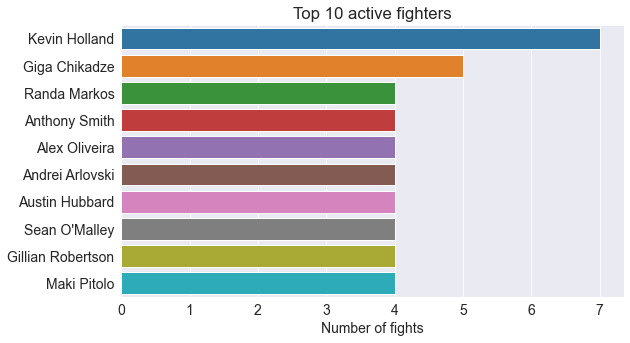

In [160]:
from collections import Counter, OrderedDict

all_fighters = df['r_fighter'].to_list() + df['b_fighter'].to_list()
count = Counter(all_fighters)
active_10 = count.most_common(10)
fighters = [item[0] for item in active_10]
times_fight = [item[1] for item in active_10]

sns.barplot(x=times_fight,y=fighters)
plt.title('Top 10 active fighters')
plt.xlabel('Number of fights')



### Who are the top 10 fighters in the UFC with the most significant strike?

In [75]:
# get top 10 strikers from both red and blue fighter
red_strikers = df['r_fighter_ss'].sort_values(ascending=False)[:11]
blue_strikers = df['b_fighter_ss'].sort_values(ascending=False)[:11]

# combine them and get the index of the top 10
combined = pd.concat([red_strikers, blue_strikers])
top_10_index = combined.sort_values(ascending=False)[:11].index
top_10_index

Int64Index([163, 436, 22, 547, 232, 497, 173, 222, 356, 547, 195], dtype='int64')

Text(0.5, 0, 'Strike')

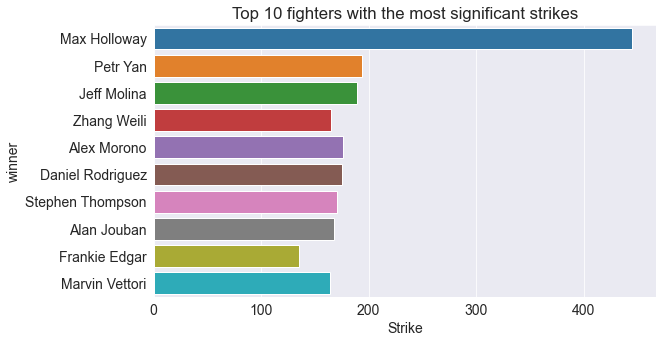

In [94]:
def get_ss_winner(serie):
    if serie['winner'] == serie['r_fighter']:
        return serie['r_fighter_ss']
    elif serie['winner'] == serie['b_fighter']:
        return serie['b_fighter_ss']

# top strikers
top_strikers = df.iloc[top_10_index]
winners = top_strikers['winner']
sig_strike = [get_ss_winner(top_strikers.iloc[i]) for i in range(0,11) ]

# bar plot
sns.barplot(y=winners, x=sig_strike)
plt.title('Top 10 fighters with the most significant strikes')
plt.xlabel('Strike')


### Which round KO/TkO take place? 

Text(0, 0.5, 'Number of KO/TKO')

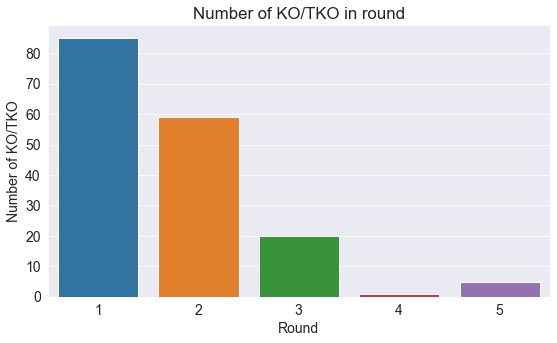

In [105]:
ko_tko = df[df['method'] == 'KO/TKO']
num_of_ko_tko = ko_tko['round'].value_counts()
sns.barplot(y=num_of_ko_tko.to_list(), x=num_of_ko_tko.index)
plt.title('Number of KO/TKO in round')
plt.xlabel('Round')
plt.ylabel('Number of KO/TKO')

### What are pecentage of method used in UFC?

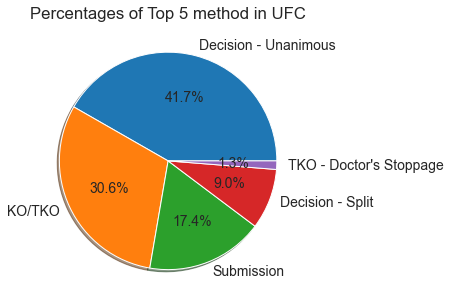

In [112]:
method = df['method'].value_counts()[:5]
plt.title('Percentages of Top 5 method in UFC')
plt.pie(method.to_list(), labels=method.index, shadow=True, autopct='%1.1f%%');

### Who are the top first round finisher by KO/TKO and by Submission ?

Text(0.5, 0, 'Count')

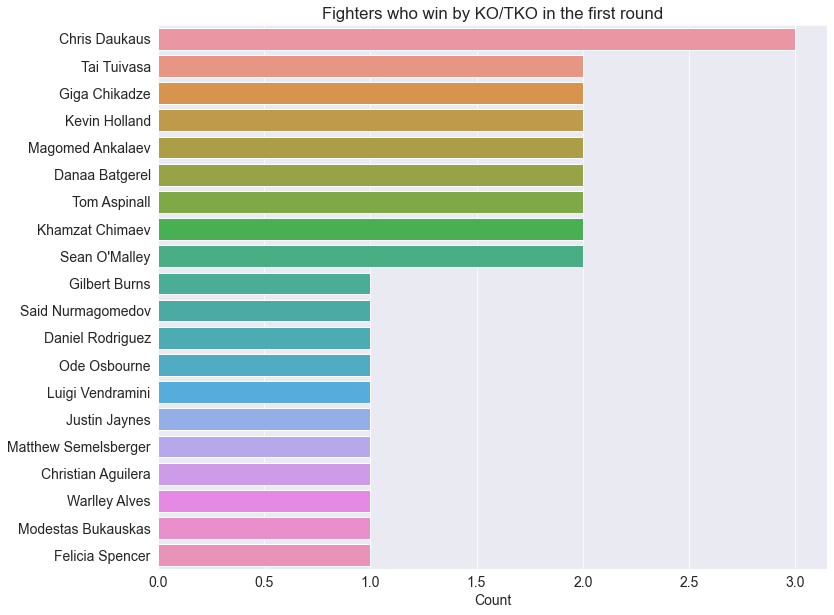

In [128]:
first_rounders_tko = df[(df['round'] == 1) & (df['method'] == 'KO/TKO')]['winner'].value_counts()[:20]

plt.figure(figsize=(12,10))
sns.barplot(x=first_rounders_tko.to_list(), y=first_rounders_tko.index)
plt.title('Fighters who win by KO/TKO in the first round')
plt.xlabel('Count')

Text(0.5, 0, 'Count')

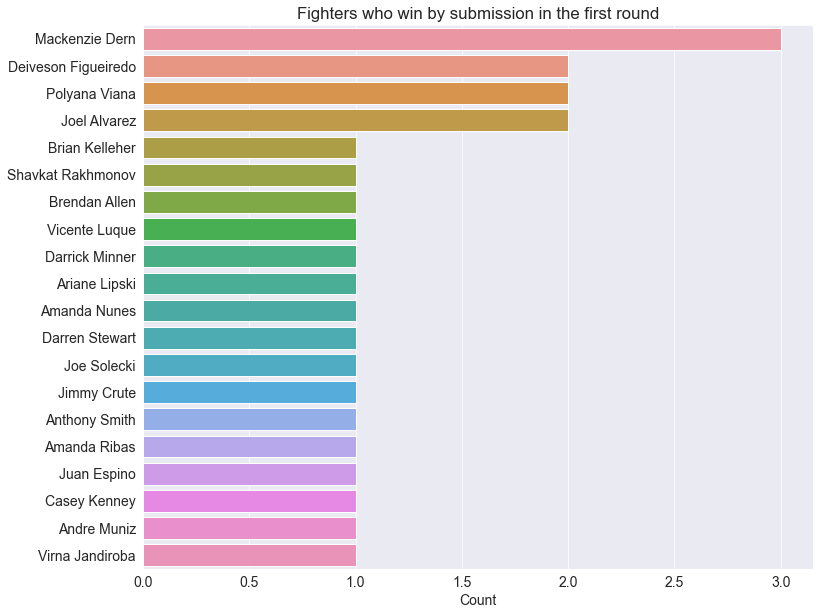

In [130]:
first_rounders_sub = df[(df['round'] == 1) & (df['method'] == 'Submission')]['winner'].value_counts()[:20]

plt.figure(figsize=(12,10))
sns.barplot(x=first_rounders_sub.to_list(), y=first_rounders_sub.index)
plt.title('Fighters who win by submission in the first round')
plt.xlabel('Count')

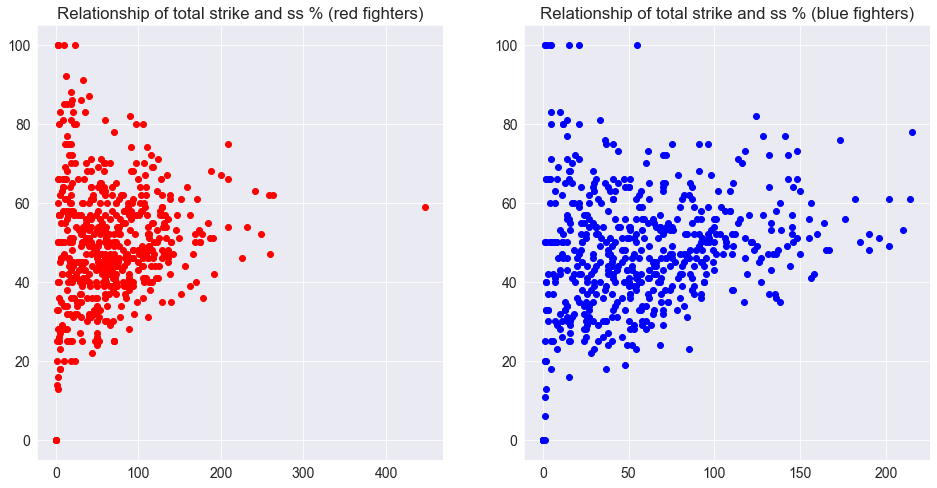

In [141]:
fig,axes = plt.subplots(1,2, figsize=(16,8))
axes[0].set_title('Relationship of total strike and ss % (red fighters)')
axes[0].scatter(df['r_fighter_total_str'], df['r_fighter_ss_pct'], color='r')
axes[1].set_title('Relationship of total strike and ss % (blue fighters)')
axes[1].scatter(df['b_fighter_total_str'], df['b_fighter_ss_pct'], color='b')

,fight_type,method,round,time,time_format,referee,details,winner,r_fighter,b_fighter,r_fighter_ss,b_fighter_ss,r_fighter_ss_pct,b_fighter_ss_pct,r_fighter_total_str,b_fighter_total_str
0,Light Heavyweight Bout,KO/TKO,2,04:29:00,5 Rnd (5-5-5-5-5),Herb Dean,Elbow to Head At Distance\n Spinning Back...,Jiri Prochazka,Dominick Reyes,Jiri Prochazka,63,77,58,56,68,78
1,Featherweight Bout,KO/TKO,1,01:03:00,3 Rnd (5-5-5),Jason Herzog,Kick to Body At Distance,Giga Chikadze,Giga Chikadze,Cub Swanson,12,4,66,66,12,4
2,Light Heavyweight Bout,Decision - Split,3,05:00:00,3 Rnd (5-5-5),Mark Smith,Dave Hagen28 - 29.Rick Winter29 - 28.Tony Week...,draw,Ion Cutelaba,Dustin Jacoby,71,84,46,56,111,100
3,Middleweight Bout,Decision - Unanimous,3,05:00:00,3 Rnd (5-5-5),Herb Dean,Sal D'amato27 - 30.Junichiro Kamijo27 - 30.Ada...,Sean Strickland,Sean Strickland,Krzysztof Jotko,84,37,46,18,84,37
4,Bantamweight Bout,Decision - Unanimous,3,05:00:00,3 Rnd (5-5-5),Chris Tognoni,Mike Bell27 - 30.Sal D'amato28 - 29.Rick Winte...,Merab Dvalishvili,Merab Dvalishvili,Cody Stamann,71,48,36,35,178,73
